<a href="https://colab.research.google.com/github/fathanzys/Data/blob/main/0102522025_UAS_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Import Library**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#**2. Data Collection**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DM/data_balita.csv')

#**3. Exploratory Data Analysis (EDA)**

In [4]:
df.head(5)

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


In [6]:
df.describe()

,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010437
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


In [7]:
print(df.isnull().sum())

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64


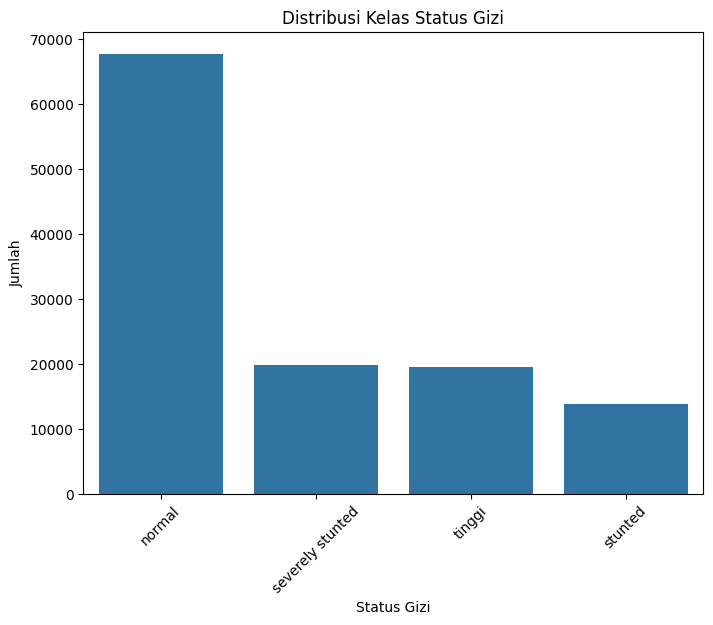

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Status Gizi', order=df['Status Gizi'].value_counts().index)
plt.title('Distribusi Kelas Status Gizi')
plt.xlabel('Status Gizi')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Select only numeric columns for quantile calculation
numeric_df = df.select_dtypes(include=np.number)

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Filter the original DataFrame based on outliers in numeric columns
df = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]

#**4. Pre Processing**

In [11]:
# Pisahkan Fitur dan Target
X = df.drop('Status Gizi', axis=1)
y = df['Status Gizi']

In [13]:
# Encode categorical features
le = LabelEncoder()
X['Jenis Kelamin'] = le.fit_transform(X['Jenis Kelamin'])

# Normalisasi Fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#**5. Model KNN**

In [14]:
# Model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
cv_knn = cross_val_score(knn, X_scaled, y, cv=5).mean()

#**6. Model Decision Tree**

In [15]:
# Model Decision Tree (with max_depth)
dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
cv_dt = cross_val_score(dt, X_scaled, y, cv=5).mean()

#**7. Model Super Vector Machine**

In [16]:
# Model SVM dengan class_weight
svm = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
cv_svm = cross_val_score(svm, X_scaled, y, cv=5).mean()

#**8. Evaluasi**

In [18]:
# Tampilkan Hasil Evaluasi
print("Akurasi KNN:", round(acc_knn, 2), " | Cross-Val:", round(cv_knn, 2))
print("Akurasi Decision Tree:", round(acc_dt, 2), " | Cross-Val:", round(cv_dt, 2))
print("Akurasi SVM:", round(acc_svm, 2), " | Cross-Val:", round(cv_svm, 2))

Akurasi KNN: 1.0  | Cross-Val: 0.53
Akurasi Decision Tree: 0.65  | Cross-Val: 0.37
Akurasi SVM: 0.77  | Cross-Val: 0.65


In [22]:
# Confusion Matrix & Classification Report untuk SVM (terbaik)
print("\n[Confusion Matrix - SVM]")
print(confusion_matrix(y_test, y_pred_svm))


[Confusion Matrix - SVM]
[[9665  718 1031 2242]
 [   0 3276  660    0]
 [   9  456 2200    0]
 [ 389  135    2 3410]]


In [21]:
print("\n[Classification Report - SVM]")
print(classification_report(y_test, y_pred_svm))


[Classification Report - SVM]
                  precision    recall  f1-score   support

          normal       0.96      0.71      0.81     13656
severely stunted       0.71      0.83      0.77      3936
         stunted       0.57      0.83      0.67      2665
          tinggi       0.60      0.87      0.71      3936

        accuracy                           0.77     24193
       macro avg       0.71      0.81      0.74     24193
    weighted avg       0.82      0.77      0.77     24193



In [24]:
print("\n[Classification Report - DT]")
print(classification_report(y_test, y_pred_dt))


[Classification Report - DT]
                  precision    recall  f1-score   support

          normal       0.97      0.56      0.71     13656
severely stunted       0.50      0.74      0.60      3936
         stunted       0.38      0.62      0.47      2665
          tinggi       0.59      0.92      0.72      3936

        accuracy                           0.65     24193
       macro avg       0.61      0.71      0.62     24193
    weighted avg       0.76      0.65      0.67     24193



In [27]:
print("\n[Classification Report - SVM]")
print(classification_report(y_test, y_pred_knn))


[Classification Report - SVM]
                  precision    recall  f1-score   support

          normal       1.00      1.00      1.00     13656
severely stunted       1.00      1.00      1.00      3936
         stunted       0.99      0.99      0.99      2665
          tinggi       1.00      1.00      1.00      3936

        accuracy                           1.00     24193
       macro avg       1.00      1.00      1.00     24193
    weighted avg       1.00      1.00      1.00     24193

